# Data Cleaning for OpenFoodFacts

## Dataset Description

Dataset Description...

In [1]:
# Import libraries

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import os
from pathlib import Path

In [2]:
# Parameters

path = str(Path(os.path.abspath(os.getcwd())).parent.absolute())
openfoodfactsUrl = path + '/data/en.openfoodfacts.org.products.tsv'

## Import Data

Load the data from a .tsv file and show the first five elements

In [3]:
# Load the data

df = pd.read_csv(openfoodfactsUrl, sep="\t")

df.head()

C:\Users\vitto\AppData\Local\Temp\ipykernel_21044\412040503.py:3: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(openfoodfactsUrl, sep="\t")


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Helper Functions

Helper functions...

In [4]:
# Plotting the dataset

def plotMissingValues(dataframe, width, high):
    plt.figure(figsize=(width, high)) 
    ax = dataframe.isnull().sum().plot.barh(color='skyblue') 


    # Customizing the plot

    plt.title('Missing Values per Column', fontsize=16)
    plt.xlabel('Number of Missing Values', fontsize=12)
    plt.ylabel('Columns', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7) 
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)


    # Display the values on the bars

    for i, v in enumerate(dataframe.isnull().sum()):
        ax.text(v + 500, i, str(v), color='gray', va='center', fontsize=8)

    plt.tight_layout()
    plt.show()

## Data Exploration

Data Exploration...

In [5]:
# View columns name

print(df.columns.values)

df.shape

['code' 'url' 'creator' 'created_t' 'created_datetime' 'last_modified_t'
 'last_modified_datetime' 'product_name' 'generic_name' 'quantity'
 'packaging' 'packaging_tags' 'brands' 'brands_tags' 'categories'
 'categories_tags' 'categories_en' 'origins' 'origins_tags'
 'manufacturing_places' 'manufacturing_places_tags' 'labels' 'labels_tags'
 'labels_en' 'emb_codes' 'emb_codes_tags' 'first_packaging_code_geo'
 'cities' 'cities_tags' 'purchase_places' 'stores' 'countries'
 'countries_tags' 'countries_en' 'ingredients_text' 'allergens'
 'allergens_en' 'traces' 'traces_tags' 'traces_en' 'serving_size'
 'no_nutriments' 'additives_n' 'additives' 'additives_tags' 'additives_en'
 'ingredients_from_palm_oil_n' 'ingredients_from_palm_oil'
 'ingredients_from_palm_oil_tags'
 'ingredients_that_may_be_from_palm_oil_n'
 'ingredients_that_may_be_from_palm_oil'
 'ingredients_that_may_be_from_palm_oil_tags' 'nutrition_grade_uk'
 'nutrition_grade_fr' 'pnns_groups_1' 'pnns_groups_2' 'states'
 'states_tags' 

(356027, 163)

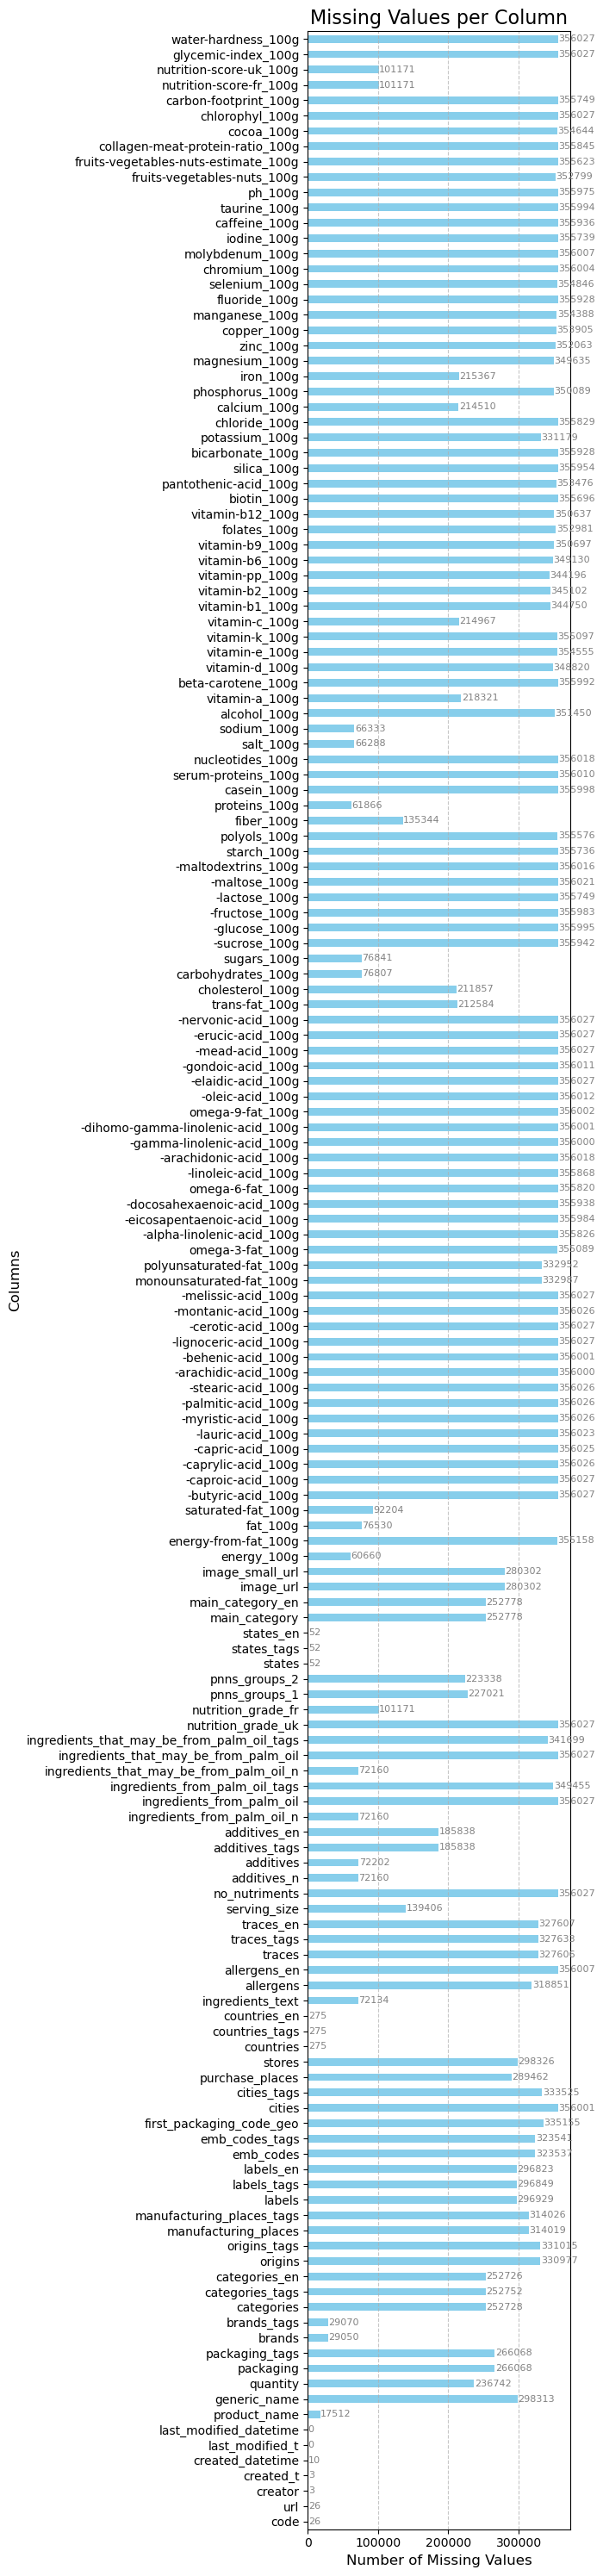

In [6]:
# Plotting the dataset
    
plotMissingValues(df, 7, 30)

## Data Cleaning

Data Cleaning...

In [7]:
# Create the filter

df_filter = ["code",
             "url",
             "creator",
             "created_t",
             "created_datetime",
             "last_modified_t",
             "last_modified_datetime",
             "product_name",
#             "quantity",
             "packaging_tags",
             "brands",
             "brands_tags",
##             "categories_tags",
##             "labels_en",
#             "countries", 
             "countries_tags",
             "countries_en",
             "ingredients_text",
             "serving_size",
             "additives_n",
             "additives",
             "additives_tags",
             "ingredients_from_palm_oil_n",
             "ingredients_that_may_be_from_palm_oil_n",
             "nutrition_grade_fr",
#             "pnns_groups_1",
#             "pnns_groups_2",
             "states",
             "states_tags",
             "states_en",
             "main_category_en",
             "energy_100g",
             "fat_100g",
#             "saturated-fat_100g",
#             "trans-fat_100g",
#             "cholesterol_100g",
             "carbohydrates_100g",
             "sugars_100g",
             "fiber_100g",
             "proteins_100g",
             "salt_100g",
#             "sodium_100g",
#             "vitamin-a_100g",
#             "vitamin-c_100g",
#             "calcium_100g",
#             "iron_100g",
             "nutrition-score-fr_100g"]

In [8]:
# Replace null values in additives_tags with empty string if additives_n is 0

def replace_null(row):
    if row['additives_n'] == 0 and pd.isnull(row['additives_tags']):
        return ""
    else:
        return row['additives_tags']
    

df['additives_tags'] = df.apply(replace_null, axis=1)

In [9]:
# Apply the filter to the Dataframe

food_table = df[df_filter].copy()

food_table["isempty"] = np.where(food_table.isnull().sum(axis=1) >= 1, 1, 0)
percentage = food_table.isempty.value_counts()[1] / food_table.shape[0] * 100
print("Percentage of dropped rows: " + str(percentage))

food_table = food_table[food_table.isempty==0].copy()
food_table.isnull().sum()

food_table.drop("isempty", inplace=True,axis=1)
food_table.dropna(axis = 0, how = "any", inplace=True)

Percentage of dropped rows: 94.00045502166971


In [10]:
food_table.shape

(21360, 33)

In [11]:
# Save the new Dataset

food_table.to_csv(path + '/data/data.tsv', sep='\t', index=False)

## Data Visualization

Data Visualization...

In [12]:
pd.set_option('display.max_columns', None)
food_table.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,packaging_tags,brands,brands_tags,countries_tags,countries_en,ingredients_text,serving_size,additives_n,additives,additives_tags,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states,states_tags,states_en,main_category_en,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
176,290616,http://world-en.openfoodfacts.org/product/0000...,b7,1484605978,2017-01-16T22:32:58Z,1484606542,2017-01-16T22:42:22Z,Salade Cesar,frais,Kirkland Signature,kirkland-signature,en:canada,Canada,INGREDIENTS : LAITUE. VINAIGRETTE (HUILE DE CA...,100 g,0.0,[ ingredients -> fr:ingredients ] [ laitue-...,,0.0,0.0,c,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","To be checked,Complete,Nutrition facts complet...",Plant-based foods and beverages,1210.0,12.00,23.00,0.000,2.000,22.00,2.1600,6.0
182,1938067,http://world-en.openfoodfacts.org/product/0000...,b7,1484501528,2017-01-15T17:32:08Z,1484504972,2017-01-15T18:29:32Z,Chaussons tressés aux pommes,frais,Kirkland Signature,kirkland-signature,en:canada,Canada,"Ingrédients : Pâte (farine, margarines d'huile...",150 g / 1 chausson,5.0,[ ingredients -> fr:ingredients ] [ pate ->...,"en:e202,en:e211,en:e330,en:e509,en:e920",0.0,0.0,c,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","To be checked,Complete,Nutrition facts complet...",Sugary snacks,1090.0,10.70,38.70,24.700,2.000,3.33,0.6470,9.0
183,4302544,http://world-en.openfoodfacts.org/product/0000...,b7,1488464896,2017-03-02T14:28:16Z,1488465687,2017-03-02T14:41:27Z,Pain Burger Artisan,"frais,plastique",Kirkland Signature,kirkland-signature,en:canada,Canada,"Ingrédients : Farine, eau, sel, levure, orge m...",90 g / 1 pain,0.0,[ ingredients -> fr:ingredients ] [ farine ...,,0.0,0.0,b,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","To be checked,Complete,Nutrition facts complet...",fr:Boulange,1160.0,1.11,53.30,1.110,2.220,10.00,1.5200,1.0
185,7020254,http://world-en.openfoodfacts.org/product/0000...,teolemon,1420150193,2015-01-01T22:09:53Z,1504376301,2017-09-02T18:18:21Z,Root Beer,"canette,metal",A&W,a-w,en:france,France,"Eau gazéifiée, sirop de maïs à haute teneur en...",33 cl,3.0,[ eau-gazeifiee -> fr:eau-gazeifiee ] [ eau...,"en:e150,en:e211,en:e999",0.0,0.0,e,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","To be checked,Complete,Nutrition facts complet...",Beverages,215.0,0.00,14.20,13.600,0.000,0.00,0.0616,18.0
187,8237798,http://world-en.openfoodfacts.org/product/0000...,b7,1491943307,2017-04-11T20:41:47Z,1491944488,2017-04-11T21:01:28Z,Quiche Lorraine,frai,Kirkland Signature,kirkland-signature,en:canada,Canada,INGRÉDIENTS : GARNITURE (SUBSTANCES LAITIÈRES....,280 g / 1/5 de la Quiche,3.0,[ ingredients -> fr:ingredients ] [ garnitu...,"en:e235,en:e316,en:e407",0.0,0.0,b,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","To be checked,Complete,Nutrition facts complet...",Meals,478.0,6.79,7.86,0.714,0.357,5.36,0.4990,2.0


In [13]:
# Splits the entries in a DataFrame's target column based on a specified separator, 
# creating new rows for each element resulting from the split.

def splitDataFrameList(df, target_column, separator):
    def splitListToRows(row, row_accumulator, target_column, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

In [14]:
food_countries = splitDataFrameList(food_table, "countries_en", ",")
countries = food_countries["countries_en"].value_counts()

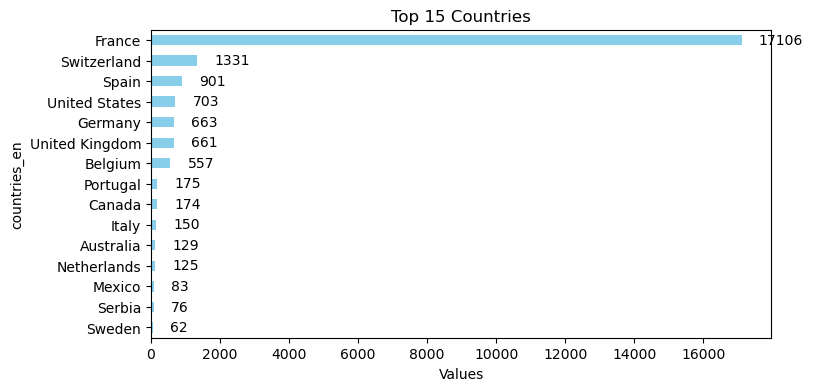

In [15]:
# Plotting the horizontal bar chart

ax = countries[:15][::-1].plot.barh(figsize=(8, 4), color='skyblue')
plt.xlabel('Values')
plt.title('Top 15 Countries')


# Displaying the value of each bar on the plot

for i, v in enumerate(countries[:15][::-1]):
    ax.text(v + 500, i, str(v), color='black', va='center', fontsize=10)

plt.show()